# TIME-SERIES FORECASTING IN STOCKS FROM(2000 TO 2021)

In [1]:
pip install yfinance  

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta

In [3]:
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
import plotly.graph_objects as go
import plotly.express as px

In [5]:
dD = pd.read_csv(r"C:\\Users\\ANESTHESIA\\Downloads\\stock_prices.csv")
dD.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2020-03-11  62.485001  63.048000  59.803501  60.770500  60.770500  52170000
1  2020-03-12  56.299999  59.693501  55.665001  55.745499  55.745499  84534000
2  2020-03-13  58.950001  60.987999  55.857151  60.986500  60.986500  74002000
3  2020-03-16  54.799999  57.613350  53.722000  54.216499  54.216499  85048000
4  2020-03-17  54.655499  56.542999  52.800499  55.990002  55.990002  77230000

In [6]:
dD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
dD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       632 non-null    object 
 1   Open       632 non-null    float64
 2   High       632 non-null    float64
 3   Low        632 non-null    float64
 4   Close      632 non-null    float64
 5   Adj Close  632 non-null    float64
 6   Volume     632 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.7+ KB


In [8]:
start = "2014-01-01"
end = '2019-1-01'
tcs = yf.download('TCS',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


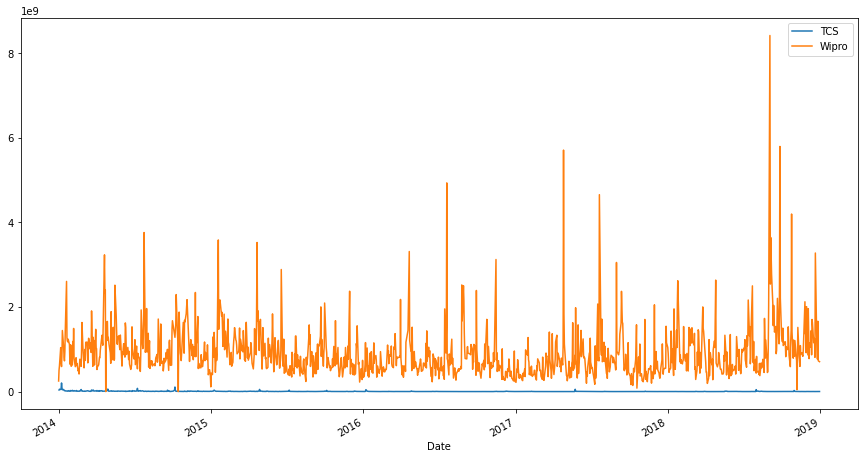

In [9]:
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,8))
wipro['MarktCap'].plot(label = 'Wipro')
plt.legend()

<AxesSubplot:xlabel='Date'>

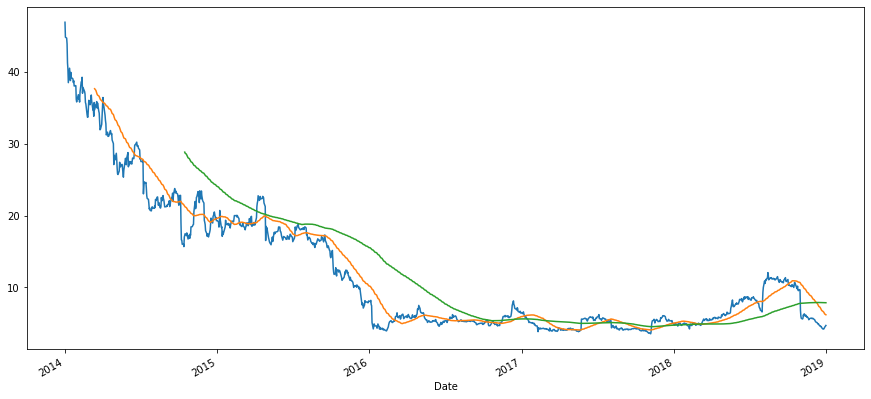

In [10]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

<Figure size 1152x576 with 0 Axes>

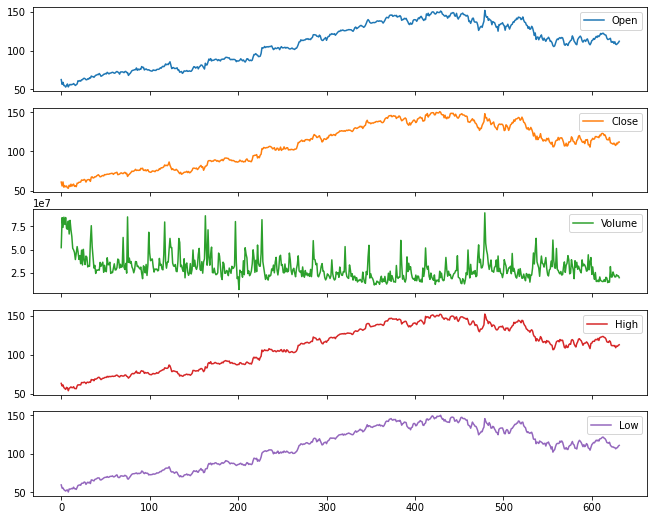

In [11]:
plt.figure(figsize=(16, 8)) 
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = dD[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [12]:
dD.describe()

Open        High         Low       Close   Adj Close  \
count  632.000000  632.000000  632.000000  632.000000  632.000000   
mean   108.337674  109.602440  107.137917  108.382393  108.382393   
std     27.507147   27.593982   27.290470   27.418889   27.418889   
min     52.825500   53.566002   50.676800   52.831001   52.831001   
25%     81.543747   82.662062   80.789373   81.714624   81.714624   
50%    113.152752  114.783001  112.029625  113.216503  113.216503   
75%    133.636879  135.621746  132.479744  133.902122  133.902122   
max    151.863495  152.100006  149.887497  150.709000  150.709000   

             Volume  
count  6.320000e+02  
mean   3.051286e+07  
std    1.326435e+07  
min    6.936000e+06  
25%    2.179800e+07  
50%    2.754000e+07  
75%    3.492650e+07  
max    8.975000e+07

In [13]:
dD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

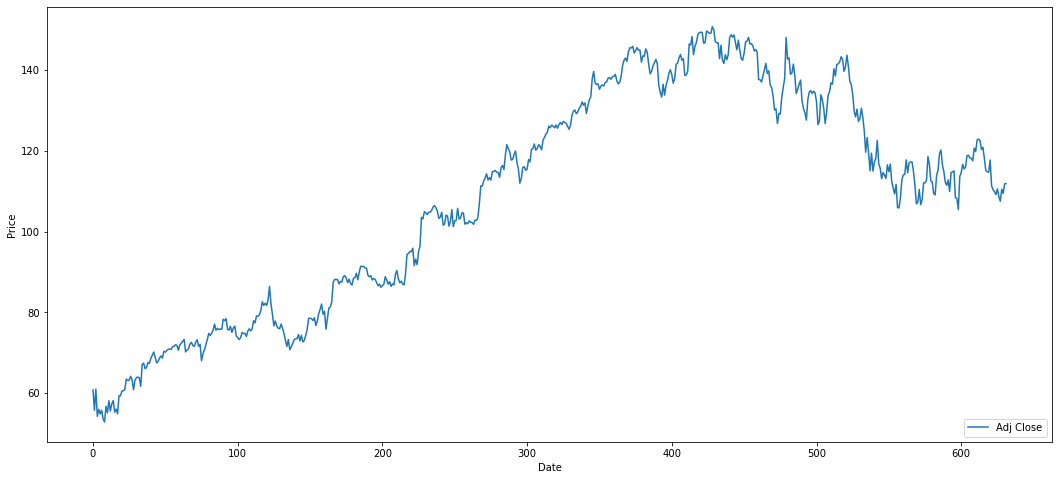

In [14]:
plt.figure(figsize=(18, 8))
dD['Adj Close'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv(r"C:\\Users\\ANESTHESIA\\Downloads\\stock_prices.csv")  
data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2020-03-11  62.485001  63.048000  59.803501  60.770500  60.770500  52170000
1  2020-03-12  56.299999  59.693501  55.665001  55.745499  55.745499  84534000
2  2020-03-13  58.950001  60.987999  55.857151  60.986500  60.986500  74002000
3  2020-03-16  54.799999  57.613350  53.722000  54.216499  54.216499  85048000
4  2020-03-17  54.655499  56.542999  52.800499  55.990002  55.990002  77230000

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
data = data[['Close']]
dataset = data.values

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [20]:
def create_sequences(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10  
X, Y = create_sequences(dataset, look_back)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
8/8 [==============================] - 7s 221ms/step - loss: 0.2004 - val_loss: 0.0612
Epoch 2/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0211 - val_loss: 0.0143
Epoch 3/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0195 - val_loss: 0.0084
Epoch 4/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 5/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0063 - val_loss: 0.0054
Epoch 6/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 7/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 9/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
8/8 [===========

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

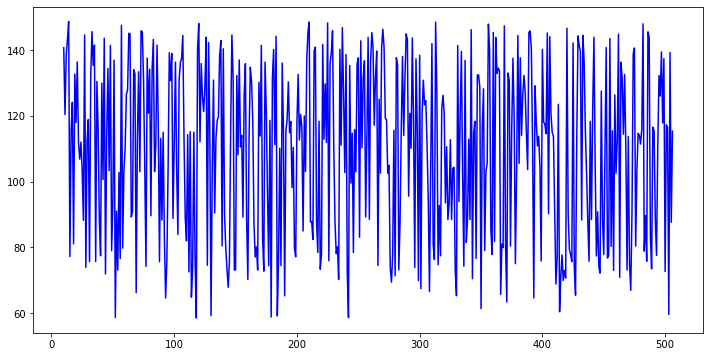

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Training Predictions', color='blue')

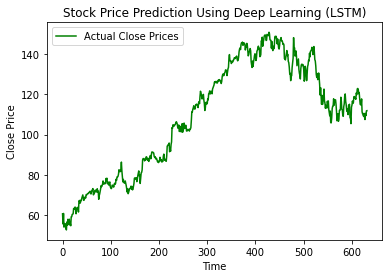

In [27]:
plt.plot(data.index, data['Close'], label='Actual Close Prices', color='green')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Stock Price Prediction Using Deep Learning (LSTM)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, train_predict)
test_mse = mean_squared_error(y_test, test_predict)
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MSE: 12491.571942125138
Testing MSE: 12384.189989352422
